In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [106]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [107]:
data_columns = ['Country','Region','Happiness Score','Economy (GDP per Capita)','Trust (Government Corruption)','Generosity','Dystopia Residual','Health (Life Expectancy)','Freedom']

In [108]:
data= data[data_columns].copy()

In [109]:
happy_df = data.rename({'Country':'country_name','Region':'region','Happiness Score':'happiness_score','Economy (GDP per Capita)':'economy_gdp_per_capita','Trust (Government Corruption)':'trust_government_corruption','Generosity':'generosity','Dystopia Residual':'dystopia_residual','Health (Life Expectancy)':'health_life_expectancy','Freedom':'freedom'})

In [110]:
happy_df.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Trust (Government Corruption),Generosity,Dystopia Residual,Health (Life Expectancy),Freedom
0,Switzerland,Western Europe,7.587,1.39651,0.41978,0.29678,2.51738,0.94143,0.66557
1,Iceland,Western Europe,7.561,1.30232,0.14145,0.43630,2.70201,0.94784,0.62877
2,Denmark,Western Europe,7.527,1.32548,0.48357,0.34139,2.49204,0.87464,0.64938
3,Norway,Western Europe,7.522,1.45900,0.36503,0.34699,2.46531,0.88521,0.66973
4,Canada,North America,7.427,1.32629,0.32957,0.45811,2.45176,0.90563,0.63297


In [111]:
happy_df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Health (Life Expectancy)         0
Freedom                          0
dtype: int64

Text(0, 0.5, 'Economy(GDP per Capita)')

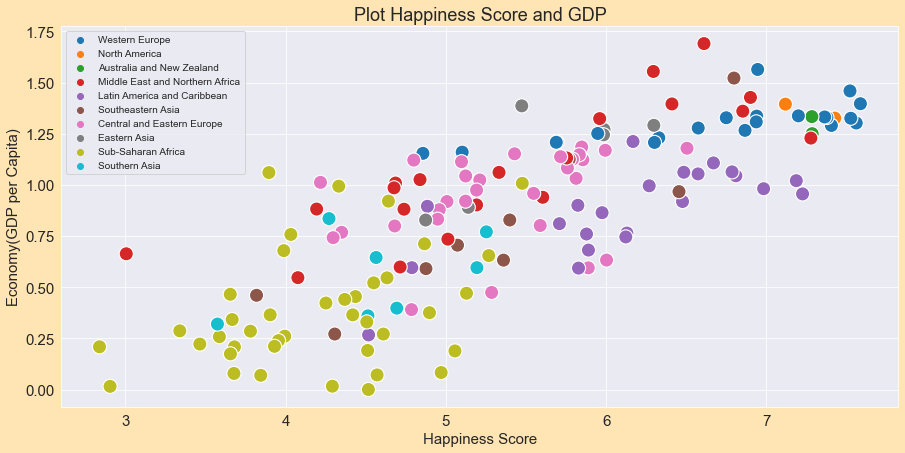

In [112]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot Happiness Score and GDP')
sns.scatterplot(x = happy_df['Happiness Score'],y = happy_df['Economy (GDP per Capita)'],hue = happy_df['Region'],s = 200)
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Economy(GDP per Capita)')

In [113]:
gdp_region = happy_df.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

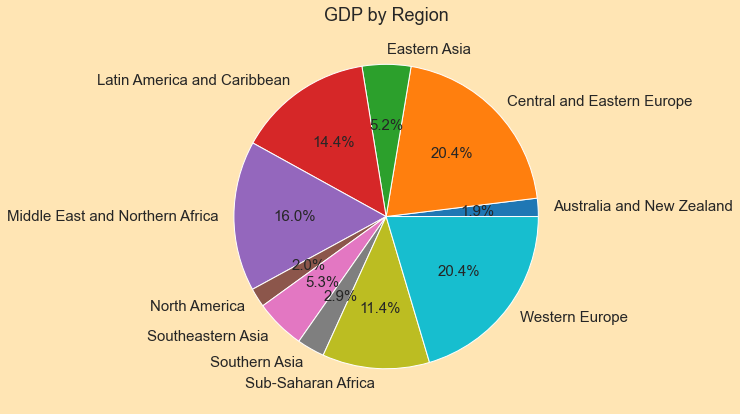

In [114]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [115]:
total_country = happy_df.groupby('Region')[['Country']].count()
total_country

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


C:\Users\prasad kalekar\AppData\Local\Temp\ipykernel_6588\3194312151.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),


<AxesSubplot:>

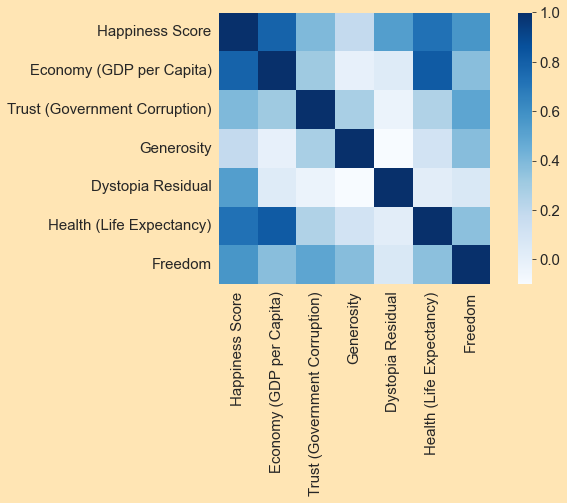

In [116]:
cor = happy_df.corr(method = 'pearson')
f,ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
           cmap='Blues', square=True,ax=ax)                               

In [117]:
corruption = happy_df.groupby('Region')[['Trust (Government Corruption)']].mean()
corruption

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

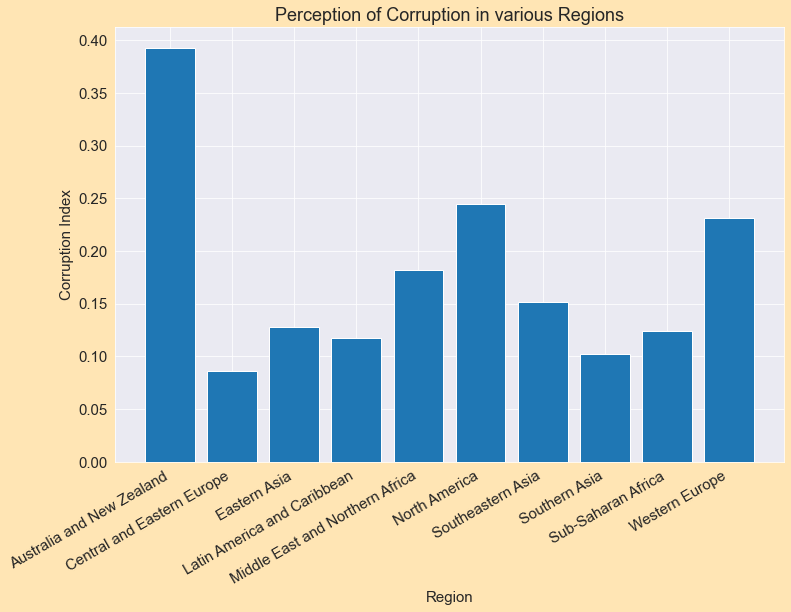

In [118]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of Corruption in various Regions')
plt.xlabel('Region',fontsize=15)
plt.ylabel('Corruption Index',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index,corruption['Trust (Government Corruption)'])

In [119]:
top_10=happy_df.head(10)
bottom_10=happy_df.tail(10)

C:\Users\prasad kalekar\AppData\Local\Temp\ipykernel_6588\2054300193.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabel, rotation=45, ha='right')


Text(112.125, 0.5, 'Life expectancy')

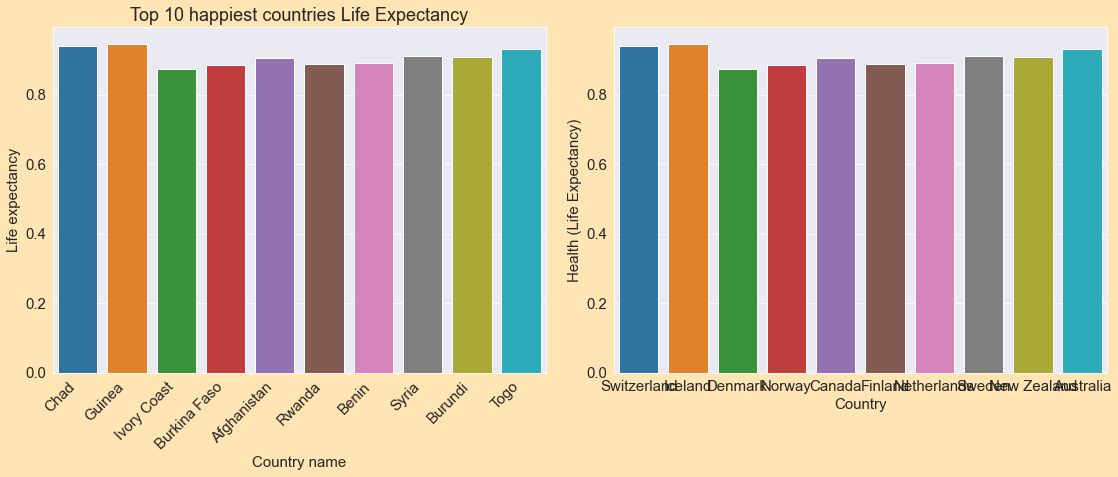

In [120]:
fig, axes=plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad=2)
xlabel=top_10.Country
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabel, rotation=45, ha='right')
sns.barplot(x=top_10['Country'],y=top_10['Health (Life Expectancy)'],ax=axes[0])
axes[0].set_xlabel('Country name')
axes[0].set_ylabel('Life expectancy')

xlabel=bottom_10.Country
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabel, rotation=45, ha='right')
sns.barplot(x=top_10['Country'],y=top_10['Health (Life Expectancy)'],ax=axes[1])
axes[0].set_xlabel('Country name')
axes[0].set_ylabel('Life expectancy')

Text(0, 0.5, 'Happiness Score')

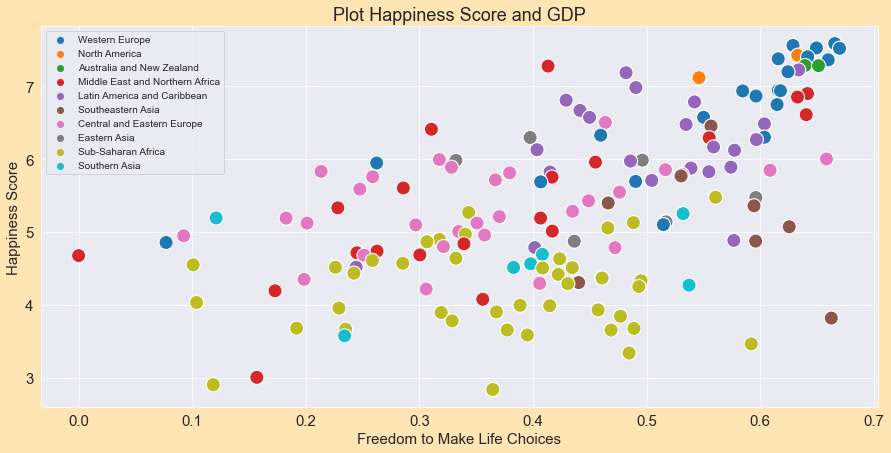

In [121]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot Happiness Score and GDP')
sns.scatterplot(x = happy_df['Freedom'],y = happy_df['Happiness Score'],hue = happy_df['Region'],s = 200)
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

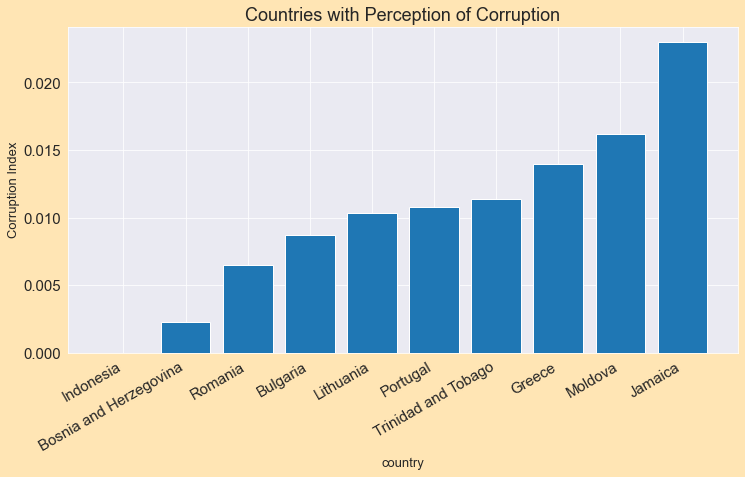

In [122]:
country = happy_df.sort_values(by='Trust (Government Corruption)').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with Perception of Corruption')
plt.xlabel('country', fontsize=13)
plt.ylabel('Corruption Index',fontsize=13)
plt.xticks(rotation=30,ha = 'right')
plt.bar(country['Country'],country['Trust (Government Corruption)'])

<BarContainer object of 10 artists>

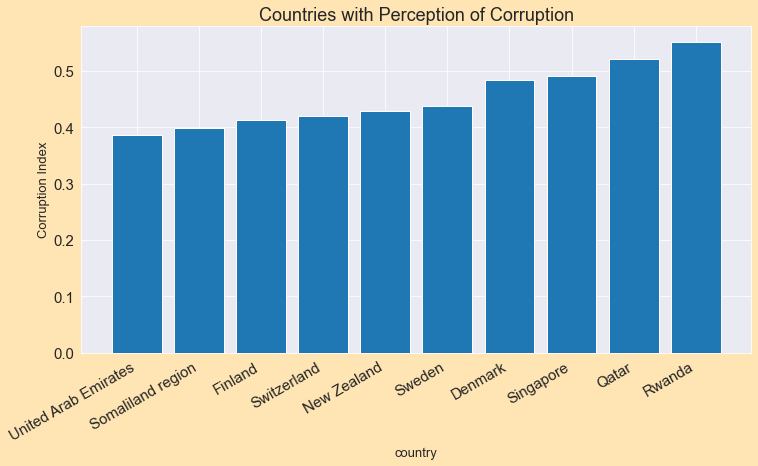

In [123]:
country = happy_df.sort_values(by='Trust (Government Corruption)').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with Perception of Corruption')
plt.xlabel('country', fontsize=13)
plt.ylabel('Corruption Index',fontsize=13)
plt.xticks(rotation=30,ha = 'right')
plt.bar(country['Country'],country['Trust (Government Corruption)'])

Text(0, 0.5, 'Happiness Score')

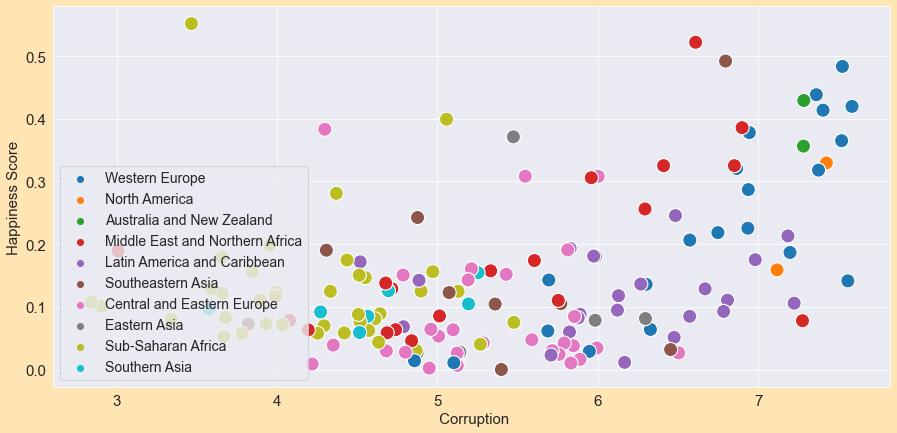

In [124]:
plt.rcParams['figure.figsize'] = (15,7)

sns.scatterplot(x = happy_df['Happiness Score'],y = happy_df['Trust (Government Corruption)'],hue = happy_df['Region'],s = 200)
plt.legend(loc='lower left',fontsize='14')
plt.xlabel(' Corruption')
plt.ylabel('Happiness Score')